In [1]:
year = 2023
day = 17

In [148]:
from aocd import submit
from aocd.models import Puzzle
from functools import reduce
import numpy as np

puzzle = Puzzle(year=year, day=day)
data = puzzle.input_data
# data = puzzle.examples[0].input_data

data = data.strip()
data = data.split("\n")
data = [list(line) for line in data]
data = np.array(data).astype("int")


headings = {
    "N": (-1, 0),
    "S": (1, 0),
    "E": (0, 1),
    "W": (0, -1),
}

neighbours_90_deg = {
    "N": [(-1, 0), (0, -1), (0, 1)],
    "S": [(1, 0), (0, -1), (0, 1)],
    "E": [(0, 1), (-1, 0), (1, 0)],
    "W": [(0, -1), (-1, 0), (1, 0)],
}

lookup_heading = {
    (-1, 0): "N",
    (1, 0): "S",
    (0, 1): "E",
    (0, -1): "W",
}

H, W = data.shape

data

array([[5, 3, 4, ..., 3, 3, 2],
       [1, 4, 3, ..., 3, 2, 4],
       [4, 3, 1, ..., 4, 4, 2],
       ...,
       [4, 3, 3, ..., 2, 3, 5],
       [4, 2, 3, ..., 3, 3, 4],
       [1, 2, 4, ..., 1, 1, 2]])

In [143]:
def get_neighbours(y, x, h, t):
    n = []
    for d_y, d_x in neighbours_90_deg[h]:
        new_h = lookup_heading[(d_y, d_x)]
        new_t = t + 1 if new_h == h else 0
        # print(y, x, h, t, new_h, new_t)
        if y + d_y < 0 or y + d_y >= H or x + d_x < 0 or x + d_x >= W:
            continue
        if (t < 3) and (h != new_h):
            continue
        if new_t > 9:
            continue
        n.append(((y + d_y, x + d_x), new_h, new_t))
    return n

In [145]:
from collections import defaultdict
cache = defaultdict(lambda: 1_000_000_000)
cache[((1,0), "S", 0)] = data[1,0]
cache[((0,1), "E", 0)] = data[0,1]
front = set(cache.keys())

for i in range(1_000):
    new_front = set()
    for key in front:
        loc, h, t = key
        y, x = loc
        curr_loss = cache[key]
        neigh = get_neighbours(y, x, h, t)

        for next_key in neigh:
            loc, _, _ = next_key
            n_y, n_x = loc
            new_loss = data[n_y, n_x]

            if curr_loss + new_loss < cache[next_key]:
                cache[next_key] = curr_loss + new_loss
                new_front.add(next_key)

    if not new_front:
        print("done", i)
        break
    front = new_front

# (0, 1) 4 4
# (0, 2) 5 5
# (1, 2) 6 6
# (1, 3) 11 11
# (1, 4) 15 15
# (1, 5) 20 20
# (0, 5) 23 19
# (0, 6) 25 28
# (0, 7) 28 31



done 377


In [87]:
example_path = """2>>34^>>>1323
32v>>>35v5623
32552456v>>54
3446585845v52
4546657867v>6
14385987984v4
44578769877v6
36378779796v>
465496798688v
456467998645v
12246868655<v
25465488877v5
43226746555v>"""

example_path = example_path.strip()
example_path = example_path.split("\n")
example_path = [list(line) for line in example_path]
example_path = np.array(example_path)

example_path = np.where((example_path == ">") | (example_path == "<") | (example_path == "^") | (example_path == "v"))
example_path = list(zip(*example_path))

path_ordered = []
y, x = 0, 0
while (y, x) != (H-1, W-1):
    if (y + 1, x) in example_path and (y+1, x) not in path_ordered:
        y, x = y+1, x
        path_ordered.append((y, x))
    elif (y - 1, x) in example_path and (y-1, x) not in path_ordered:
        y, x = y-1, x
        path_ordered.append((y, x))
    elif (y, x + 1) in example_path and (y, x+1) not in path_ordered:
        y, x = y, x+1
        path_ordered.append((y, x))
    elif (y, x - 1) in example_path and (y, x-1) not in path_ordered:
        y, x = y, x-1
        path_ordered.append((y, x))
    else:
        print("error")
        break


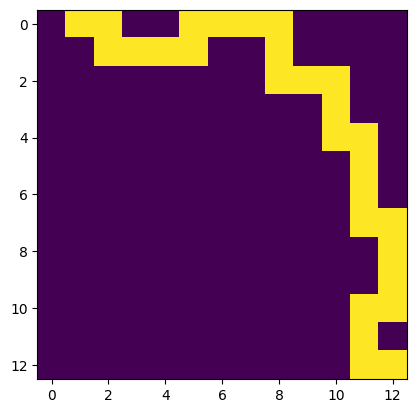

In [88]:
vis = np.zeros(data.shape)
for y, x in example_path:
    vis[y, x] = 1
import matplotlib.pyplot as plt

plt.imshow(vis)

In [89]:
path_ordered

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 8),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 10),
 (4, 10),
 (4, 11),
 (5, 11),
 (6, 11),
 (7, 11),
 (7, 12),
 (8, 12),
 (9, 12),
 (10, 12),
 (10, 11),
 (11, 11),
 (12, 11),
 (12, 12)]

In [90]:
values = [data[y, x] for y, x in path_ordered]
cost_path = np.cumsum(values)

for loc, cost in zip(path_ordered, cost_path):


    k = [key for key in cache.keys() if key[0] == loc]
    k
    v = min([cache[key] for key in k])

    print(loc, cost, v)



(0, 1) 4 4
(0, 2) 5 5
(1, 2) 6 6
(1, 3) 11 11
(1, 4) 15 15
(1, 5) 20 20
(0, 5) 23 19
(0, 6) 25 28
(0, 7) 28 31
(0, 8) 29 37
(1, 8) 32 35
(2, 8) 37 40
(2, 9) 41 44
(2, 10) 43 46
(3, 10) 47 50
(4, 10) 52 55
(4, 11) 55 58
(5, 11) 60 63
(6, 11) 66 69
(7, 11) 71 74
(7, 12) 74 76
(8, 12) 81 83
(9, 12) 84 87
(10, 12) 87 90
(10, 11) 93 101
(11, 11) 96 109
(12, 11) 99 109
(12, 12) 102 104


In [ ]:
# 1141 too high